In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ratings_df = pd.read_csv('./podaci/rating.csv')

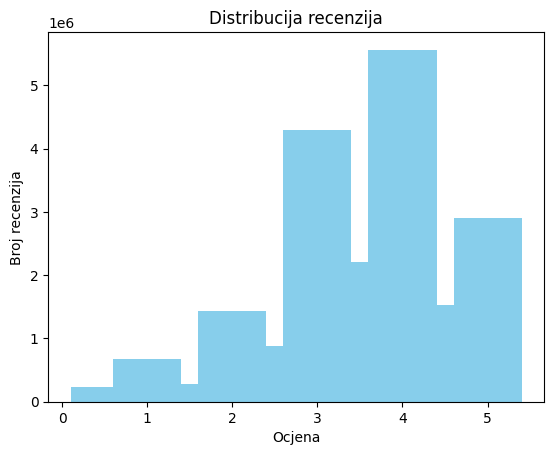

In [7]:
rating_counts = ratings_df['rating'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Ocjena')
plt.ylabel('Broj recenzija')
plt.title('Distribucija recenzija')
plt.show()

In [8]:
table_data = pd.DataFrame({'Recenzija': rating_counts.index, 'Broj': rating_counts.values})
print(table_data)

   Recenzija     Broj
0        0.5   239125
1        1.0   680732
2        1.5   279252
3        2.0  1430997
4        2.5   883398
5        3.0  4291193
6        3.5  2200156
7        4.0  5561926
8        4.5  1534824
9        5.0  2898660


In [9]:
mean_rating = ratings_df['rating'].mean()
median_rating = ratings_df['rating'].median()

print(f"Srednja vrijednost (mean) recenzija: {mean_rating}")
print(f"Mediana recenzija: {median_rating}")

Srednja vrijednost (mean) recenzija: 3.5255285642993797
Mediana recenzija: 3.5


In [10]:
user_avg_ratings = ratings_df.groupby('userId')['rating'].mean()

movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean()

print("Prosjek recenzija po korisniku:")
print(user_avg_ratings.head())

print("\nProsjek recenzija po filmu:")
print(movie_avg_ratings.head())

Prosjek recenzija po korisniku:
userId
1    3.742857
2    4.000000
3    4.122995
4    3.571429
5    4.272727
Name: rating, dtype: float64

Prosjek recenzija po filmu:
movieId
1    3.921240
2    3.211977
3    3.151040
4    2.861393
5    3.064592
Name: rating, dtype: float64


In [11]:
user_avg_review_count = ratings_df.groupby('userId')['rating'].count().mean()

movie_avg_review_count = ratings_df.groupby('movieId')['rating'].count().mean()

print(f"Prosjek količine recenzija po korisniku: {user_avg_review_count}")
print(f"Prosjek količine recenzija po filmu: {movie_avg_review_count}")

Prosjek količine recenzija po korisniku: 144.4135299257002
Prosjek količine recenzija po filmu: 747.8411232425965


In [17]:
import seaborn as sns
movies_df = pd.read_csv('./podaci/movie.csv')

In [19]:
genres_split = movies_df['genres'].str.split('|', expand=True)
movies_df = pd.concat([movies_df, genres_split], axis=1)

In [20]:
movies_melted = pd.melt(movies_df, id_vars=['movieId', 'title', 'genres'], value_vars=list(genres_split.columns)[1:], value_name='genre').dropna()
genre_counts = movies_melted['genre'].value_counts()

C:\Users\DT User3\AppData\Local\Temp\ipykernel_248\2891326649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


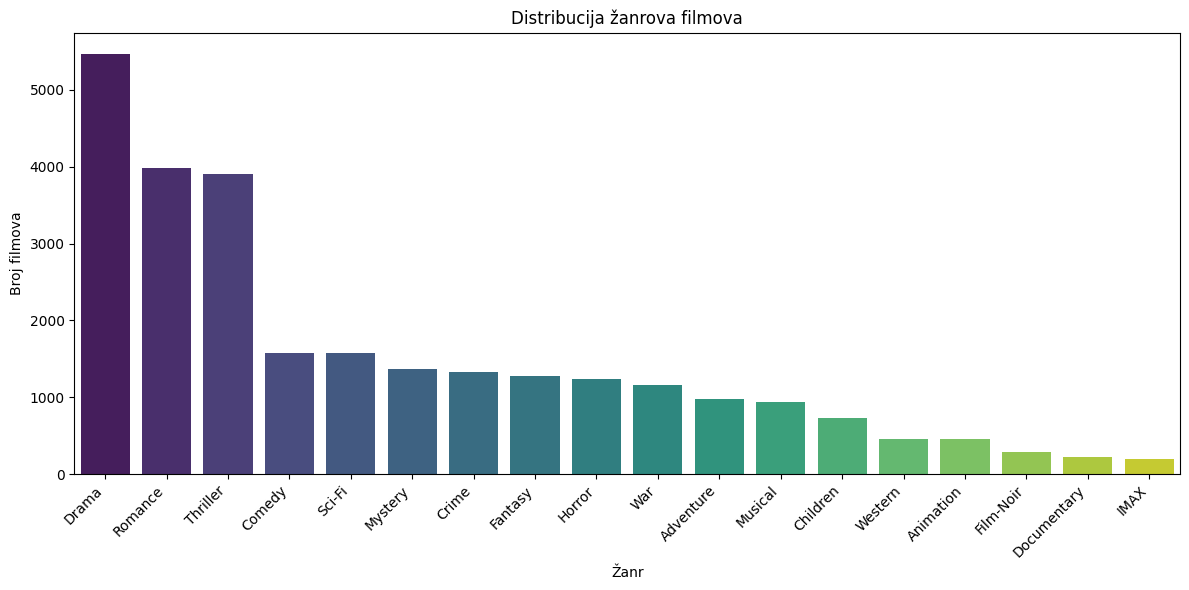

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xlabel('Žanr')
plt.ylabel('Broj filmova')
plt.title('Distribucija žanrova filmova')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [23]:
tags_df = pd.read_csv('./podaci/tag.csv')

C:\Users\DT User3\AppData\Local\Temp\ipykernel_248\3271246124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index[:10], y=tag_counts.values[:10], palette="viridis")


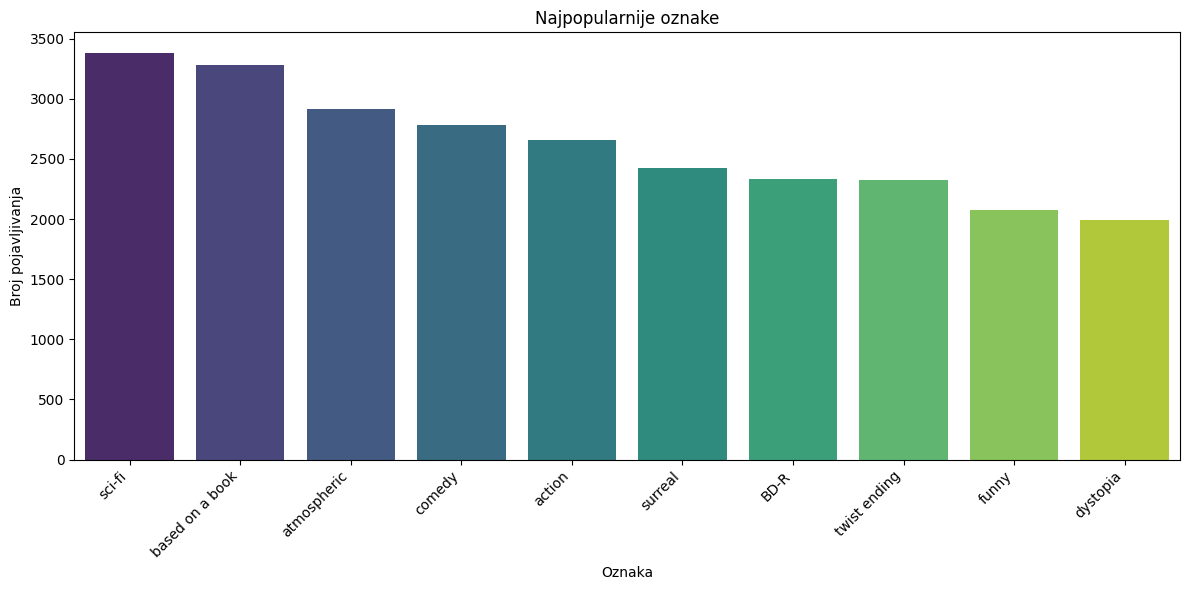

In [24]:
tag_counts = tags_df['tag'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=tag_counts.index[:10], y=tag_counts.values[:10], palette="viridis")
plt.xlabel('Oznaka')
plt.ylabel('Broj pojavljivanja')
plt.title('Najpopularnije oznake')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

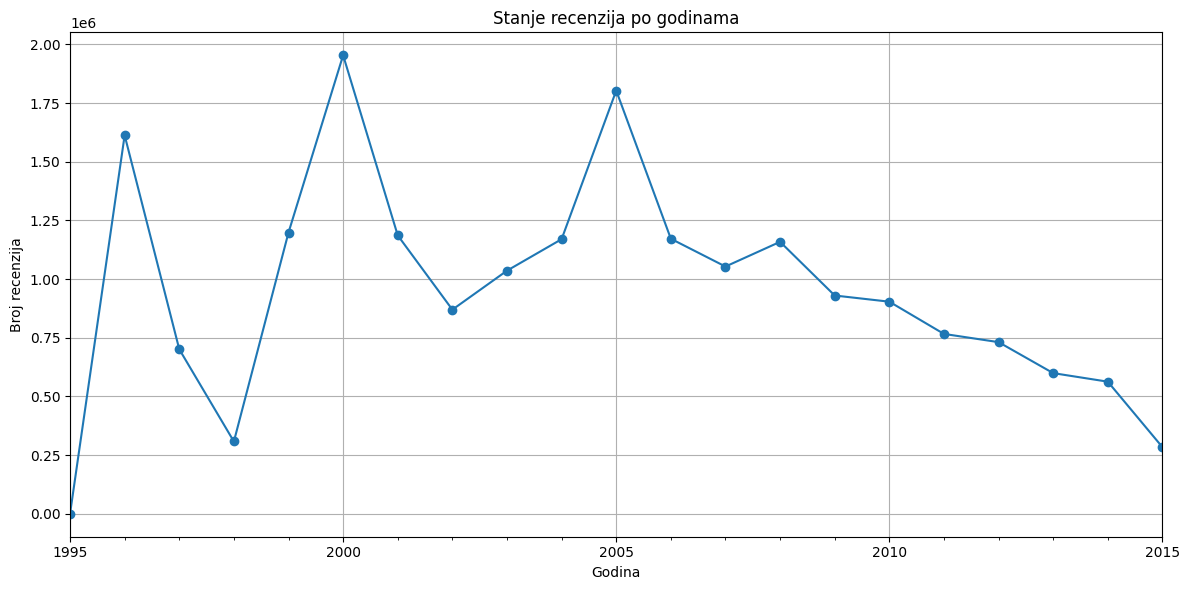

In [30]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])
reviews_over_years = ratings_df.groupby(ratings_df['timestamp'].dt.to_period("Y")).size()

plt.figure(figsize=(12, 6))
reviews_over_years.plot(marker='o', linestyle='-')
plt.xlabel('Godina')
plt.ylabel('Broj recenzija')
plt.title('Stanje recenzija po godinama')
plt.grid(True)
plt.tight_layout()
plt.show()